# Лабораторная работа №3

## Набор данных Students Performance in Exams (Успеваемость студентов на экзаменах)

Выгрузка данных из CSV файла в датафрейм

In [201]:
import pandas as pd
import numpy as np
from sklearn import set_config
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns



set_config(transform_output="pandas")

random_state=9
# Загрузка данных
df = pd.read_csv("..//..//static//csv//StudentsPerformance.csv")


### Описание набора  

Контекст
Оценки, полученные студентами

Содержание
Этот набор данных состоит из оценок, полученных учащимися по различным предметам.

Вдохновение
Понять влияние происхождения родителей, подготовки к тестированию и т. д. на успеваемость учащихся.

### Анализ содержимого

*Объекты наблюдения:* студенты, участвующие в экзаменах.

*Атрибуты объектов:* 

1. gender — пол: определяет гендерную принадлежность студента (мужской, женский).  
2. race/ethnicity — этническая принадлежность: группа, к которой относится студент (например, различные расовые/этнические категории).  
3. parental level of education — уровень образования родителей(например, среднее образование, высшее образование и т.д.).  
4. lunch — тип обеда: информация о том, получает ли студент бесплатный или платный обед.  
5. test preparation course — курс подготовки к тесту
6. math score  — результаты экзаменов по математике.
7. reading score — результаты экзаменов по чтению.
8. writing score — результаты экзаменов по письму.


### Бизнес-цель:

Сегментация студентов на основе их успеваемости и факторов, влияющих на результаты экзаменов. Кластеризация поможет выявить группы студентов с похожими характеристиками, что может быть полезно для:  
**Персонализированного подхода**: Выявить группы студентов, которым требуется дополнительная помощь или поддержка, например, по подготовке к экзаменам или улучшению питания.  
**Целевая помощь**: Разработка программ помощи для студентов, чьи результаты могут быть улучшены, например, через курс подготовки к тестам.  
**Мониторинг образования**: Оценка факторов, влияющих на успех в обучении, для улучшения образовательных методов.


### Понижение размерности и визуализация данных

Перед тем как применять алгоритмы кластеризации, можно выполнить понижение размерности, чтобы упростить визуализацию и улучшить производительность. Для этого применим методы, такие как PCA (Principal Component Analysis).

Так как данные имеют категориальные переменные, их следует преобразовать в числовые с помощью OneHotEncoder или LabelEncoder, а затем применить PCA.

In [202]:
from sklearn.preprocessing import StandardScaler
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True).astype(int)
scaler = StandardScaler()
df_encoded[['math score','reading score','writing score']] = scaler.fit_transform(df_encoded[['math score','reading score','writing score']])

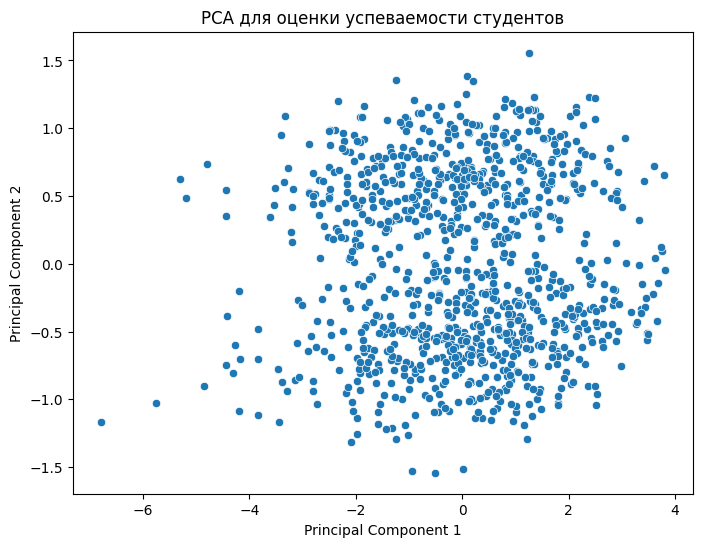

In [203]:
# Применение PCA для понижения размерности до 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_encoded)
# Преобразуем результат в DataFrame для удобства работы с seaborn
pca_df = pd.DataFrame(X_pca, columns=['pca0', 'pca1'])
# Визуализация
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='pca0', y='pca1')
plt.title('PCA для оценки успеваемости студентов')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Каждая точка на графике соответствует студенту, а положение точки показывает, как студент распределяется по этим двум главным компонентам.



### Выбор количества кластеров

Для выбора оптимального количества кластеров можно использовать следующие методы:

1. **Оценка инерции** (сумма квадратов расстояний от точек до их центроидов). Инерция часто используется для выбора числа кластеров в алгоритме KMeans.
2. **Коэффициент силуэта** (Silhouette Score), который измеряет, насколько хорошо каждый объект подходит своему кластеру и насколько хорошо он отделен от других кластеров.

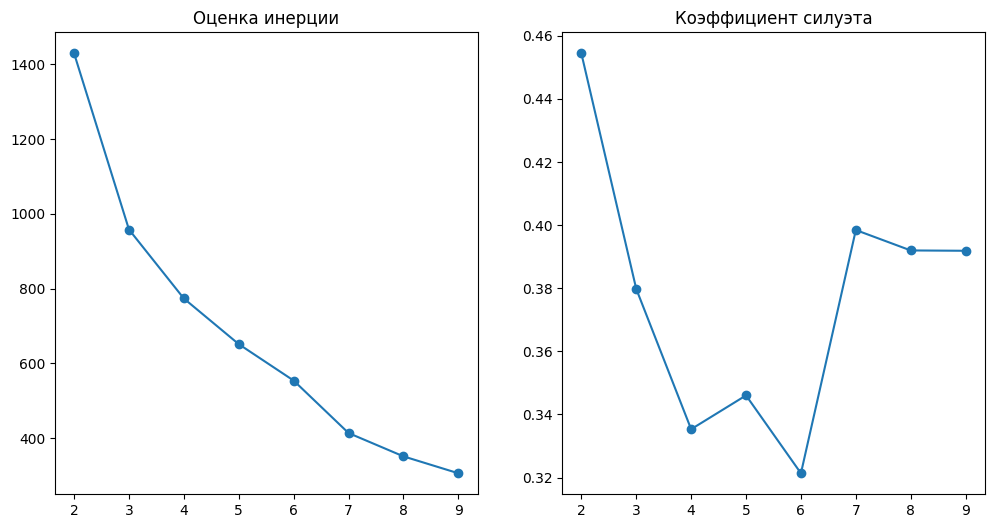

In [204]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Оценка инерции для различных количеств кластеров
inertia = []
silhouette_avg = []

for n_clusters in range(2, 10):  # Пытаемся от 2 до 10 кластеров
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)  # Используем данные после PCA
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(X_pca, kmeans.labels_))

# Визуализация инерции и силуэта
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Оценка инерции')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_avg, marker='o')
plt.title('Коэффициент силуэта')

plt.show()


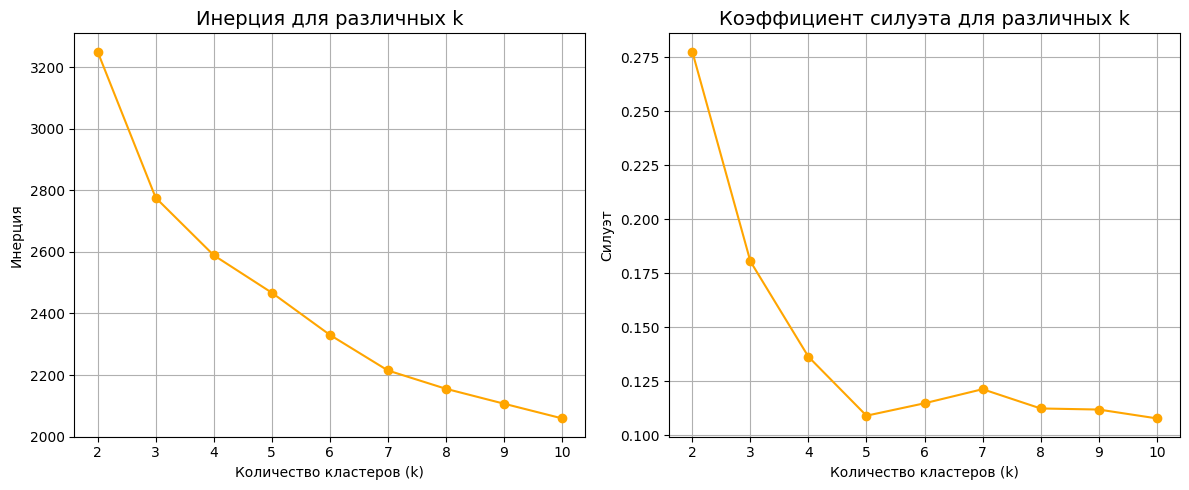

In [205]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Списки для хранения метрик
inertia = []
silhouette_scores = []

# Оценка для числа кластеров от 2 до 10
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_encoded)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_encoded, labels))

# Визуализация инерции
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', color='orange')
plt.title('Инерция для различных k', fontsize=14)
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.grid(True)

# Визуализация коэффициента силуэта
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Коэффициент силуэта для различных k', fontsize=14)
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Силуэт')
plt.grid(True)

plt.tight_layout()
plt.show()

Оптимальное количество кластеров — от 2 до 5

### Выполнение кластерного анализа с применением иерархического и неиерархического алгоритма кластеризации

#### Неиерархический алгоритм (например, KMeans)

In [206]:
from sklearn.cluster import KMeans

# Используем оптимальное количество кластеров, например, 3
kmeans = KMeans(n_clusters=5, random_state=random_state)
kmeans.fit(X_pca)

# Получаем метки кластеров
labels = kmeans.labels_

# Добавляем метки кластеров к данным
df_encoded['Cluster_KMeans'] = labels

print(df_encoded['Cluster_KMeans'].head())

0    3
1    1
2    1
3    0
4    2
Name: Cluster_KMeans, dtype: int32


#### Иерархический алгоритм (например, агломеративная кластеризация)

0    4
1    2
2    2
3    0
4    1
Name: Cluster_Agglomerative, dtype: int64


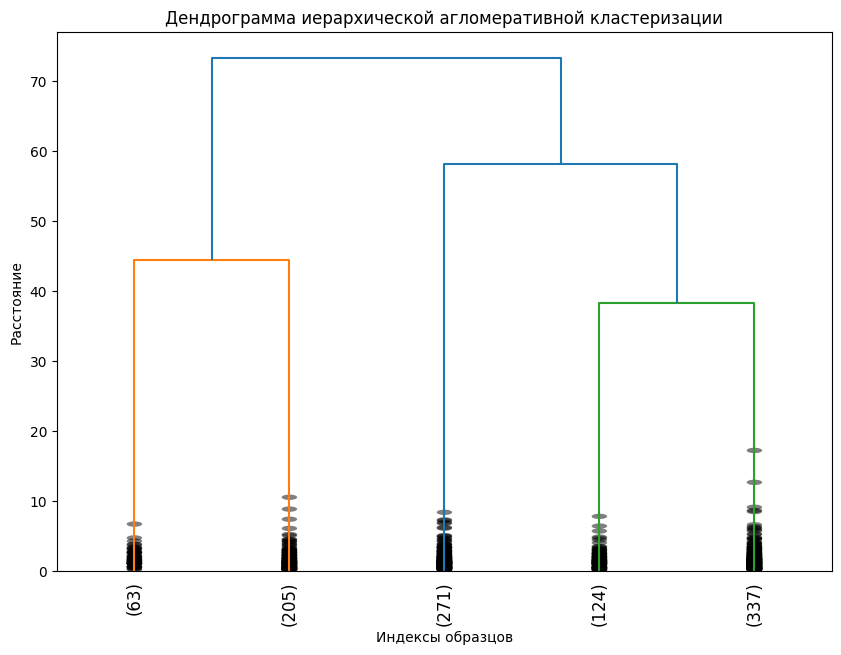

In [207]:
from sklearn.cluster import AgglomerativeClustering

# Агломеративная кластеризация
agg_clust = AgglomerativeClustering(n_clusters=5)
agg_clust.fit(X_pca)

# Получаем метки кластеров
df_encoded['Cluster_Agglomerative'] = agg_clust.labels_
print(df_encoded['Cluster_Agglomerative'].head())

from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(df_encoded, method='ward')

plt.figure(figsize=(10, 7))
hierarchy.dendrogram(
    linkage_matrix, 
    truncate_mode='lastp', 
    p=5, 
    leaf_rotation=90., 
    leaf_font_size=12., 
    show_contracted=True
)
plt.title('Дендрограмма иерархической агломеративной кластеризации')
plt.xlabel('Индексы образцов')
plt.ylabel('Расстояние')
plt.show()

### Оценка качества решения

Для оценки качества кластеризации можно использовать:   
**Визуализация**: Построение графиков с метками кластеров (например, с использованием PCA).   
**Коэффициент силуэта**: Метрическая оценка качества кластеров.

In [208]:
# Коэффициент силуэта для KMeans
sil_score_kmeans = silhouette_score(X_pca, df_encoded['Cluster_KMeans'])
print(f"Коэффициент силуэта для KMeans: {sil_score_kmeans}")


Коэффициент силуэта для KMeans: 0.36834520397007814


Если коэффициент силуэта близок к 1, это означает, что кластеры хорошо разделены. Если он близок к 0, кластеры пересекаются, а если он близок к -1, это означает плохую кластеризацию. В нашем случае, можно сказать, что кластеры пересекаются.

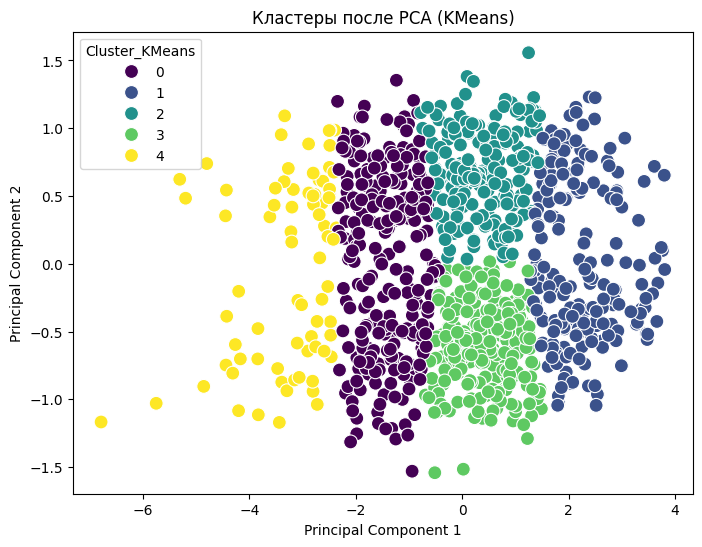

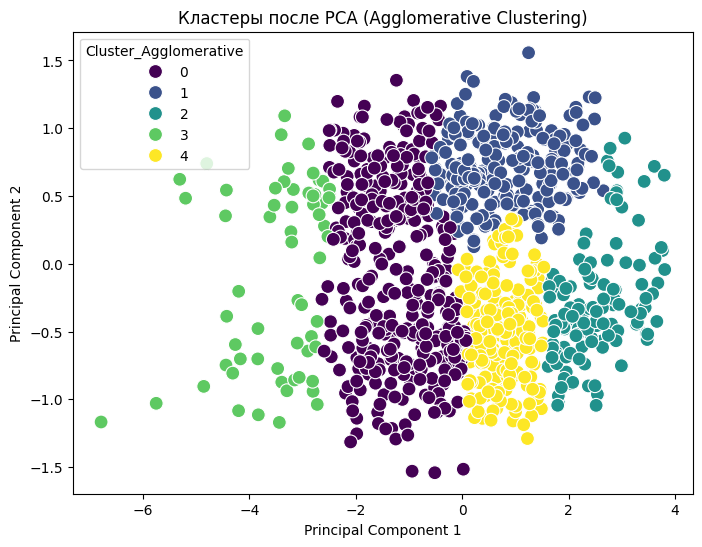

In [209]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='pca0', y='pca1', hue=df_encoded['Cluster_KMeans'], palette="viridis", s=100)
plt.title('Кластеры после PCA (KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='pca0', y='pca1', hue=df_encoded['Cluster_Agglomerative'], palette="viridis", s=100)
plt.title('Кластеры после PCA (Agglomerative Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()